In [4]:
import networkx as nx
import time
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
# from networkx.algorithms import community
import community as louvain
import matplotlib.cm as cm
import matplotlib.colors as mpcol
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
from community import community_louvain

%matplotlib inline

In [5]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'1.1.1'

In [6]:
def undirected_network(G):
    G_simple = nx.Graph()
    for i,j,data in G.edges(data=True):
        w = data['weight'] if 'weight' in data else 1.0
        if G_simple.has_edge(i,j):
            G_simple[i][j]['weight'] += w
        else:
            G_simple.add_edge(i,j,weight=w)
    return G_simple

In [26]:
def find_communities(G):
    start_time = time.time()
    partition = community_louvain.best_partition(G)
    part_dict = {}
    values = []
    for node in G.nodes():
        values.append(partition.get(node))
        part_dict.update({node:partition.get(node)})
    communities_louvain1 = max(values)+1
    end_time = time.time()
    mod_louvain = community_louvain.modularity(partition,G)
    print('Communities found using the Louvain algorithm: {} \nModularity: {} \nTime for finding the communities: {} s'.format(communities_louvain1, mod_louvain,round((end_time-start_time),3)))
    return part_dict

In [28]:

def plot_communities(city_sw):
    
    #List of color
    Color_barragan = ['#E1CF3F','#F47757','#FD4581','#97577C','#BDA7A9','#E1CF3F','#F47757','#FD4581',
                 '#e44623','#e45a6a','#c9d3e6','#7d513d',
                 '#e65949','#d6b240','#382a29','#d8d4c9',
                 '#e4cc34','#ccb42c','#bc8ca4','#3c84c4',
                 '#dd4d3d','#52172f','#63494a','#e2d5d3',
                 '#f7abcc','#e085a1','#943d39','#2d1d19']
    #Create the color map
    Barragan = mpcol.ListedColormap(Color_barragan, name='Barragan')
    G_drive = ox.project_graph(city_sw)
    G_simple = undirected_network(G_drive)
    part_dict = find_communities(G_simple)
    nx.set_node_attributes(G_drive, part_dict, 'community')
    communities = [(G_drive.nodes()[i]['community']) for i in G_drive.nodes()]
    com = [x[1] for x in G_drive.nodes(data='community')]
    norm = mpcol.Normalize(vmin=min(com), vmax=max(com), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=Barragan)
    nc=[mapper.to_rgba(x) for x in com]
    save = True

    fig, ax = ox.plot_graph(G_drive, bgcolor='black', node_color=nc, node_size=8.5, node_zorder=3, node_alpha=1, 
                        edge_linewidth=0.25, edge_color='white',edge_alpha=1,close=True, show=True,
                         save=save)

In [9]:
# get street networks by location name
def get_street_network(location):
    G = ox.graph_from_place(location)
    ox.plot_graph(G)

#get street network from polygon and save to shp
def get_street_network_shp(location, location_name):
    polygon = location.iloc[0]['geometry']
    G = ox.graph_from_polygon(polygon)
    ox.save_graph_shapefile(G, filepath=location_name)
    ox.plot_graph(G)
    return G  

#get network metrics
def get_network_metrics(city_sw, location_name):
    gdf_nodes, gdf_edges = ox.graph_to_gdfs(city_sw)
    gdf_nodes.to_csv(f'network-metrics/{location_name}-nodes.csv')
    gdf_edges.to_csv(f'network-metrics/{location_name}-edges.csv')

    closeness_centrality = nx.closeness_centrality(city_sw)
    closeness_table = pd.DataFrame(list(closeness_centrality.items()))
    closeness_table.to_csv(f'network-metrics/{location_name}-closeness.csv')
    
    betweeness_centrality = nx.betweenness_centrality(ox.get_digraph(city_sw), weight='length')
    betweeness_table = pd.DataFrame(list(betweeness_centrality.items()))
    betweeness_table.to_csv(f'network-metrics/{location_name}-betweeness.csv')

#     page_rank = nx.pagerank(city_sw, alpha=0.8)
#     page_rank_table = pd.DataFrame(list(page_rank.items()))
#     page_rank.to_csv(f'network-metrics/{location_name}-page_rank.csv')

    return gdf_nodes, gdf_edges, closeness_table, betweeness_table

In [10]:
# load shapefiles of new wave cities

# sta rosa city
sta_rosa = gpd.read_file('nw_cities_shp/Sta Rosa.shp')

# lipa city
lipa = gpd.read_file('nw_cities_shp/Lipa City.shp')

# dasmarinas city
dasmarinas = gpd.read_file('nw_cities_shp/Dasmarinas.shp')

# naga city
naga = gpd.read_file('nw_cities_shp/Naga City.shp')

# baguio city
baguio = gpd.read_file('nw_cities_shp/Baguio.shp')

# CDO city
cdo = gpd.read_file('nw_cities_shp/Cagayan de Oro.shp')

# Street Networks

## Sta Rosa City

C:\Users\rache\anaconda3\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


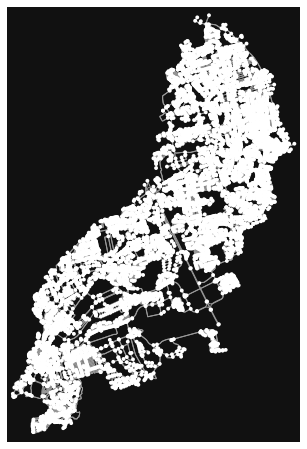

In [11]:
sta_rosa_sw = get_street_network_shp(sta_rosa, "sta_rosa_sw")
sta_rosa_sw

Communities found using the Louvain algorithm: 93 
Modularity: 0.9750972651864346 
Time for finding the communities: 2.613 s


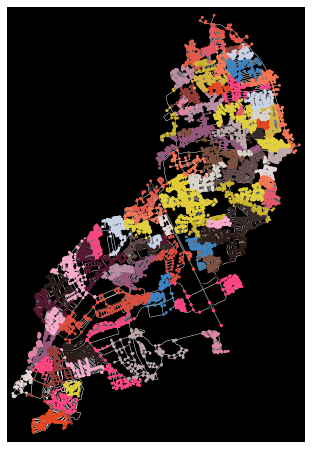

In [29]:
# plot communities
plot_communities(sta_rosa_sw)

In [ ]:
get_network_metrics(sta_rosa_sw,'sta-rosa')

In [ ]:
get_betweeness(manila_sw, 'manila')

## Lipa City

C:\Users\rache\anaconda3\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


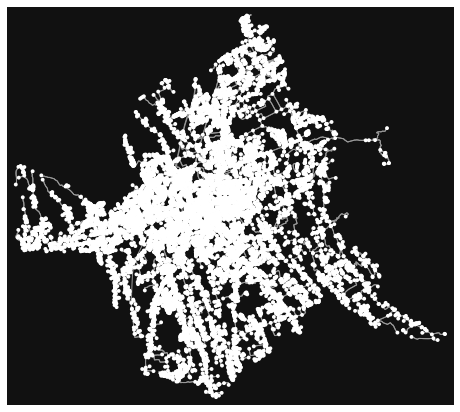

In [30]:
lipa_sw = get_street_network_shp(lipa,'lipa_sw')
lipa_sw

In [ ]:
get_network_metrics(lipa_sw,'lipa')

(                    y           x  street_count          highway  \
 osmid                                                              
 241412672   14.000149  121.155262             1              NaN   
 260205532   13.928713  121.110635             3              NaN   
 260205533   13.928915  121.106216             3              NaN   
 260702825   13.902695  121.126304             3              NaN   
 272308499   13.994503  121.168094             3  traffic_signals   
 ...               ...         ...           ...              ...   
 9136845601  13.948968  121.137285             1              NaN   
 9136845605  13.947912  121.136506             1              NaN   
 9137225735  13.890712  121.150480             1              NaN   
 9137225736  13.890780  121.150816             3              NaN   
 9137227136  13.890894  121.153382             1              NaN   
 
                               geometry  
 osmid                                   
 241412672   POIN

Communities found using the Louvain algorithm: 118 
Modularity: 0.9795555516800978 
Time for finding the communities: 2.818 s


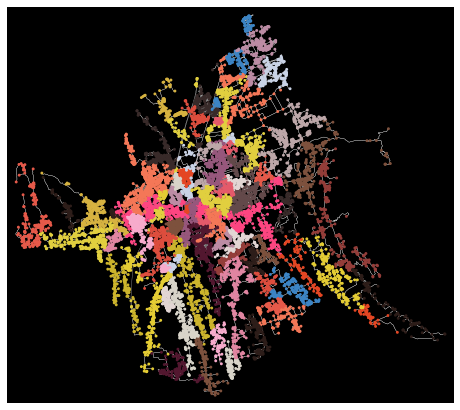

In [31]:
# plot communities
plot_communities(lipa_sw)

## Cagayan de Oro City 

C:\Users\rache\anaconda3\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


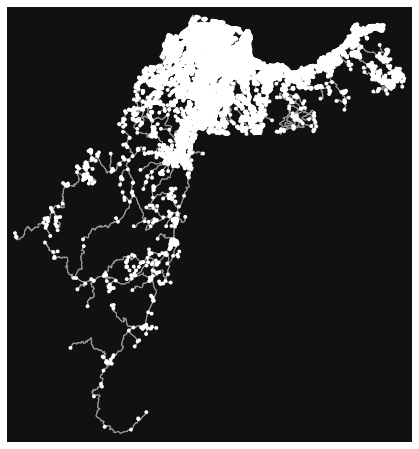

In [32]:
cdo_sw = get_street_network_shp(cdo,'cdo_sw')
cdo_sw

In [ ]:
get_network_metrics(cdo_sw,'cdo')

(                   y           x  street_count highway  \
 osmid                                                    
 282290875   8.502722  124.752647             3     NaN   
 282305245   8.484060  124.644916             3     NaN   
 282305248   8.483482  124.644493             4     NaN   
 282305251   8.477963  124.642426             4     NaN   
 282305255   8.480706  124.645047             3     NaN   
 ...              ...         ...           ...     ...   
 9119059126  8.393368  124.609304             3     NaN   
 9119071387  8.400797  124.609331             1     NaN   
 9125387176  8.403698  124.603952             3     NaN   
 9137619268  8.474129  124.725463             1     NaN   
 9137619269  8.475666  124.721981             3     NaN   
 
                              geometry  
 osmid                                  
 282290875   POINT (124.75265 8.50272)  
 282305245   POINT (124.64492 8.48406)  
 282305248   POINT (124.64449 8.48348)  
 282305251   POINT (124.64

Communities found using the Louvain algorithm: 109 
Modularity: 0.9775606329431258 
Time for finding the communities: 4.022 s


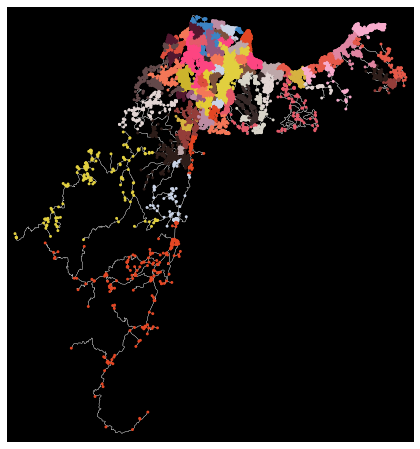

In [40]:
# plot communities
plot_communities(cdo_sw)

## Baguio City

C:\Users\rache\anaconda3\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


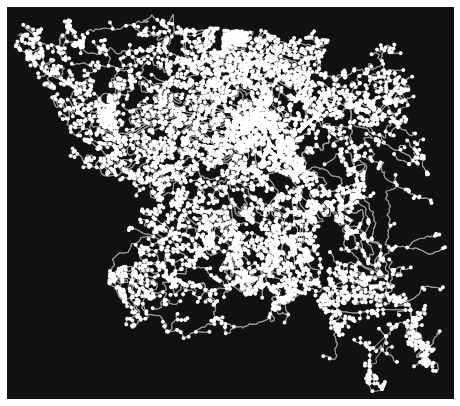

In [34]:
baguio_sw = get_street_network_shp(baguio, 'baguio_sw')
baguio_sw

In [ ]:
get_network_metrics(baguio_sw,'baguio')

(                    y           x  street_count highway  \
 osmid                                                     
 16984749    16.409182  120.595112             3     NaN   
 16984752    16.412542  120.593924             3     NaN   
 16984796    16.411191  120.597163             3     NaN   
 16984798    16.408366  120.594279             4     NaN   
 16988406    16.412979  120.591436             3     NaN   
 ...               ...         ...           ...     ...   
 9126406517  16.412272  120.586694             1     NaN   
 9126406533  16.413136  120.586341             3     NaN   
 9129744965  16.419384  120.589167             1     NaN   
 9129744966  16.419551  120.589304             1     NaN   
 9129744973  16.419245  120.589302             3     NaN   
 
                               geometry  
 osmid                                   
 16984749    POINT (120.59511 16.40918)  
 16984752    POINT (120.59392 16.41254)  
 16984796    POINT (120.59716 16.41119)  
 1698479

Communities found using the Louvain algorithm: 67 
Modularity: 0.958338386781682 
Time for finding the communities: 1.107 s


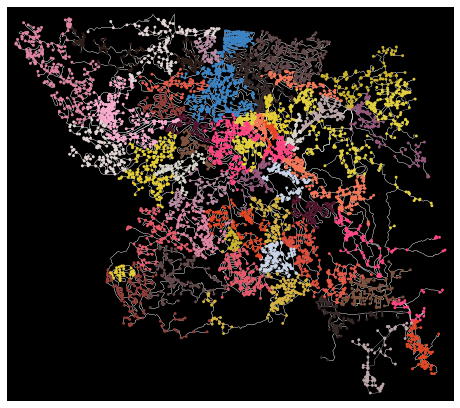

In [35]:
# plot communities
plot_communities(baguio_sw)

## Dasmarinas City

C:\Users\rache\anaconda3\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


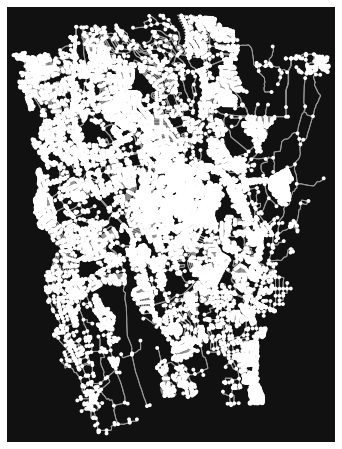

In [36]:
dasma_sw = get_street_network_shp(dasmarinas, 'dasma_sw')
dasma_sw

In [ ]:
get_network_metrics(dasma_sw,'dasmarinas')

(                    y           x  street_count   highway  ref  \
 osmid                                                            
 27391263    14.351600  120.953891             3       NaN  NaN   
 27391290    14.352289  120.946119             3       NaN  NaN   
 27391291    14.352286  120.945896             3       NaN  NaN   
 27391330    14.293611  120.937506             4  crossing  NaN   
 27582810    14.315987  120.944483             3       NaN  NaN   
 ...               ...         ...           ...       ...  ...   
 9057768579  14.316151  120.944132             1       NaN  NaN   
 9057768580  14.316214  120.944213             4       NaN  NaN   
 9057768581  14.316245  120.944253             4       NaN  NaN   
 9083503410  14.317473  120.957033             3       NaN  NaN   
 9083503411  14.317163  120.958459             1       NaN  NaN   
 
                               geometry  
 osmid                                   
 27391263    POINT (120.95389 14.35160)  
 

Communities found using the Louvain algorithm: 115 
Modularity: 0.9784178582460058 
Time for finding the communities: 4.827 s


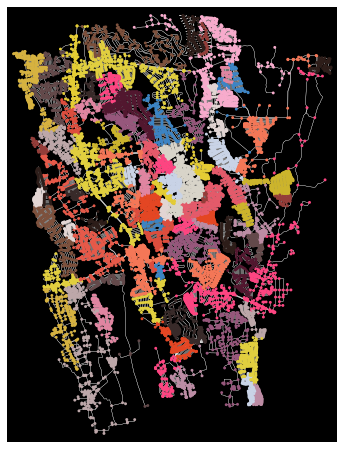

In [37]:
# plot communities
plot_communities(dasma_sw)

## Naga City

C:\Users\rache\anaconda3\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


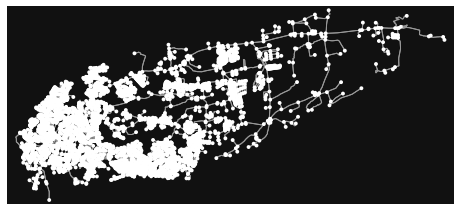

In [38]:
naga_sw = get_street_network_shp(naga, 'naga_sw')
naga_sw

In [ ]:
get_network_metrics(naga_sw, 'naga')

(                    y           x  street_count highway  \
 osmid                                                     
 191131752   13.633147  123.199035             3     NaN   
 191131774   13.633489  123.200014             3     NaN   
 193253039   13.626910  123.198893             3     NaN   
 196717438   13.644635  123.191770             3     NaN   
 196717549   13.644413  123.193656             3     NaN   
 ...               ...         ...           ...     ...   
 8994988338  13.625966  123.200968             3     NaN   
 8995503130  13.617784  123.231379             3     NaN   
 8995503135  13.617746  123.231181             3     NaN   
 9048709164  13.613757  123.218606             1     NaN   
 9048709173  13.613328  123.219436             3     NaN   
 
                               geometry  
 osmid                                   
 191131752   POINT (123.19903 13.63315)  
 191131774   POINT (123.20001 13.63349)  
 193253039   POINT (123.19889 13.62691)  
 1967174

Communities found using the Louvain algorithm: 68 
Modularity: 0.9615494264962862 
Time for finding the communities: 0.734 s


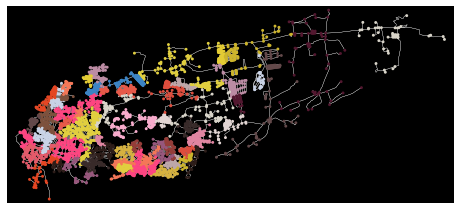

In [39]:
# plot communities
plot_communities(naga_sw)